In [1]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***ISAAC REYES***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.utils import to_categorical
import missingno as msno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer as MICE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from enum import EnumMeta
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv',delimiter = ",")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   size          13224 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13240 non-null  object 
 6   bath          13167 non-null  float64
 7   balcony       12635 non-null  float64
 8   price         13240 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13167.0,2.691501,1.343284,1.0,2.0,2.0,3.0,40.0
balcony,12635.0,1.583854,0.817913,0.0,1.0,2.0,2.0,3.0
price,13240.0,112.493455,149.206816,8.0,50.0,72.0,120.0,3600.0


In [6]:
df_copy=df.copy

borro datos sin relevancia

In [7]:
df['total_sqft']= pd.to_numeric(df['total_sqft'],errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   size          13224 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    12993 non-null  float64
 6   bath          13167 non-null  float64
 7   balcony       12635 non-null  float64
 8   price         13240 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


IMPUTACION

In [9]:
le=LabelEncoder()

In [10]:
size = df['size'].str.split(expand=True)
size.columns = ['val_size','val_cat']
df = pd.concat([df, size], axis=1)
df['val_cat'] = le.fit_transform(df['val_cat'])
df = df.drop('size',axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    12993 non-null  float64
 5   bath          13167 non-null  float64
 6   balcony       12635 non-null  float64
 7   price         13240 non-null  float64
 8   val_size      13224 non-null  object 
 9   val_cat       13320 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1.0+ MB


In [12]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,val_size,val_cat
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,1
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2,0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5,1
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600.0,5.0,NaN,400.00,4,0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2,0
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689.0,4.0,1.0,488.00,4,0


IMPUTACIÓN

In [13]:
df.loc[df.price<=50, 'Price']='bajo'
df.loc[df.price>=120, 'Price']='alto'
df['Price']=le.fit_transform(df['Price'])
df=df.drop(['society', 'price'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13240 non-null  object 
 2   location      13239 non-null  object 
 3   total_sqft    12993 non-null  float64
 4   bath          13167 non-null  float64
 5   balcony       12635 non-null  float64
 6   val_size      13224 non-null  object 
 7   val_cat       13320 non-null  int64  
 8   Price         13320 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 936.7+ KB


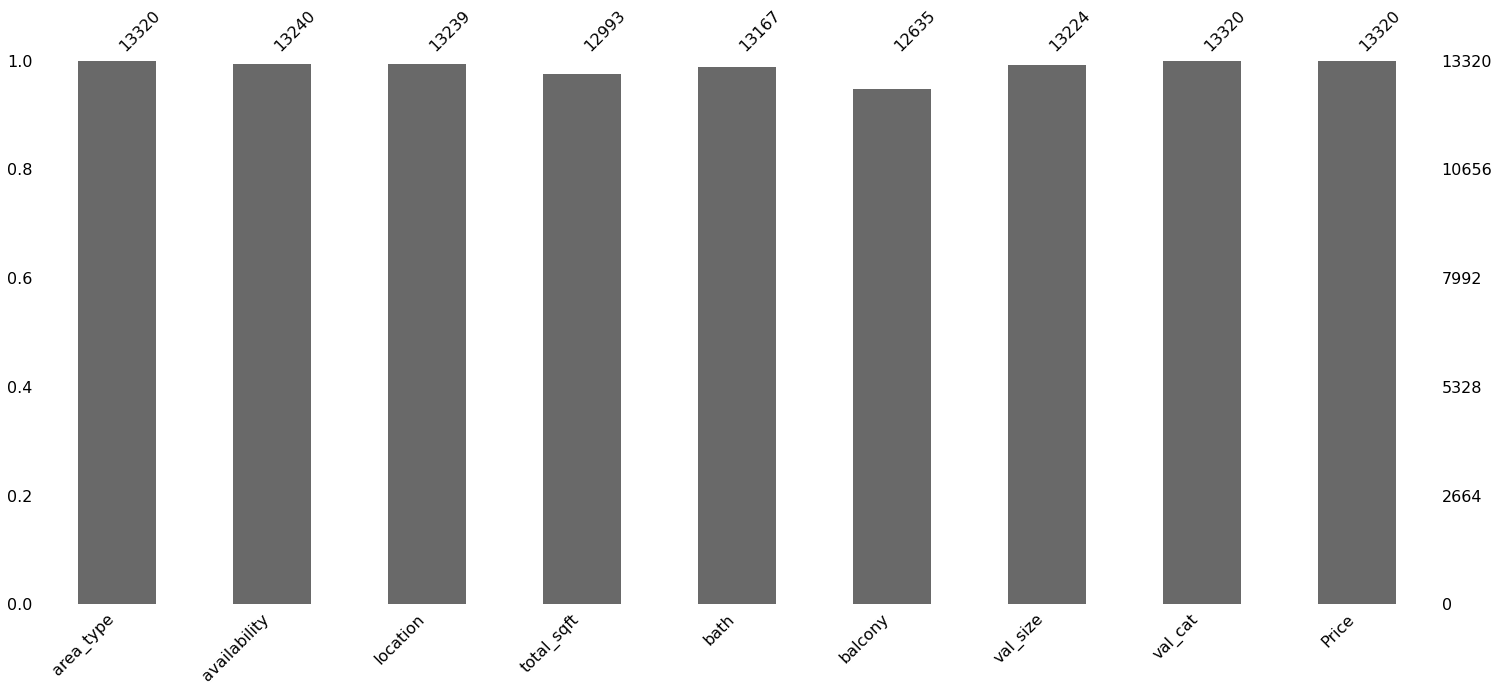

In [15]:
msno.bar(df)

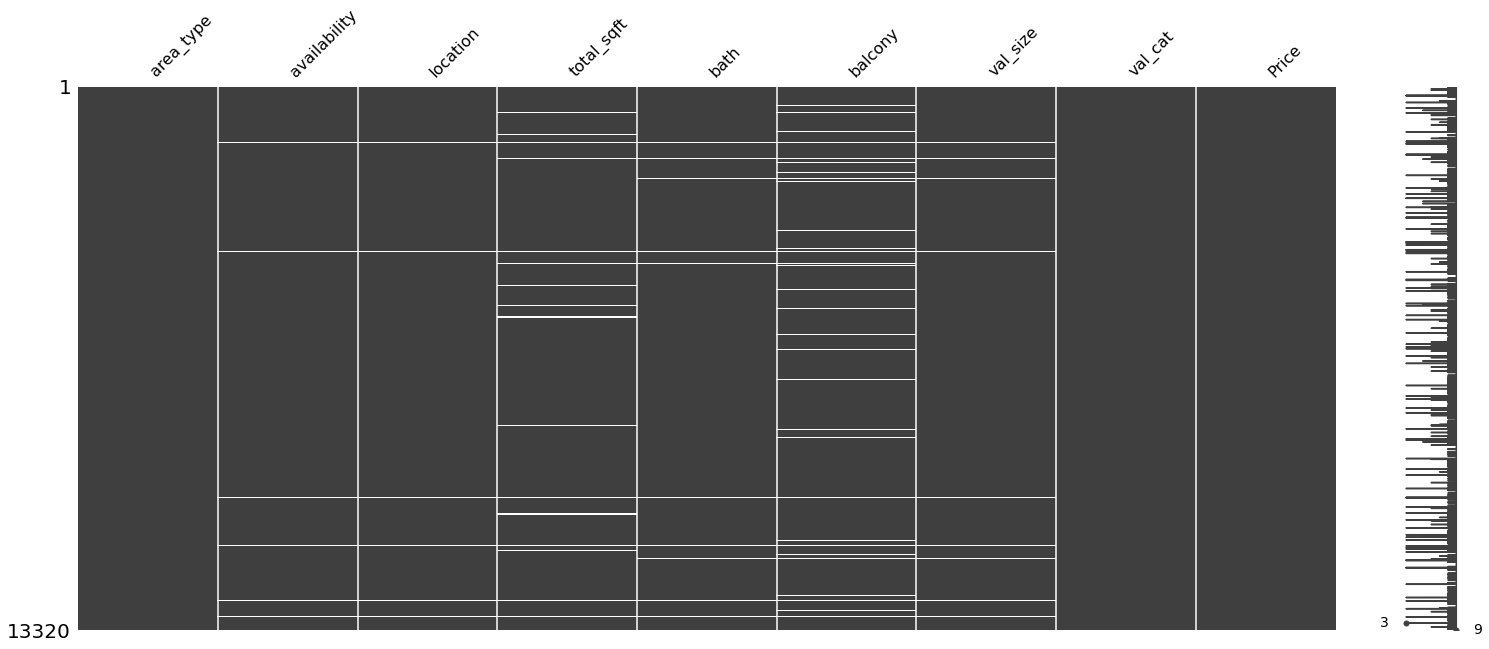

In [16]:
msno.matrix(df)

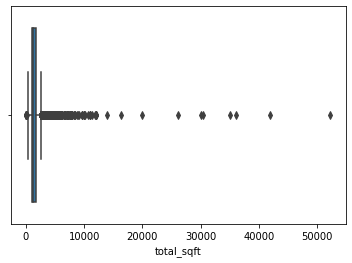

In [17]:
sns.boxplot(x=df['total_sqft'])

In [18]:
df['area_type']= le.fit_transform(df['area_type'])

df = df.drop('location', axis=1)

In [19]:
df=df.fillna(df.mean())

<ipython-input-19-6f8c6f28e805>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [20]:
df['val_size'] = pd.to_numeric(df['val_size'], errors = 'coerce')
df['val_size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., nan, 11.,  9., 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [21]:
df.isnull().sum()

area_type        0
availability    80
total_sqft       0
bath             0
balcony          0
val_size        96
val_cat          0
Price            0
dtype: int64

In [22]:
df['val_size'].unique()
mode = df['val_cat'].mode()[0]
df['val_cat'] = df['val_cat'].fillna(mode)

In [23]:
df=df.fillna(df.mean())
df.isnull().sum()

<ipython-input-23-e9ad13d354b0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


area_type        0
availability    80
total_sqft       0
bath             0
balcony          0
val_size         0
val_cat          0
Price            0
dtype: int64

In [24]:
X = df.drop(['Price'],axis=1)
y = df['Price']

DUMMIES

In [25]:
X = pd.get_dummies(X) 
simpleImputer = SimpleImputer()
X_imputed = pd.DataFrame(simpleImputer.fit_transform(X))
X_imputed.columns = X.columns
X_imputed

,area_type,total_sqft,bath,balcony,val_size,val_cat,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,...,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Immediate Possession,availability_Ready To Move
0,73.0,1056.0,2.0,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,2600.0,5.0,3.000000,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1440.0,2.0,3.000000,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73.0,1521.0,3.0,1.000000,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73.0,1200.0,2.0,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0.0,3453.0,4.0,0.000000,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13316,73.0,3600.0,5.0,1.583854,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13317,0.0,1141.0,2.0,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13318,73.0,4689.0,4.0,1.000000,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_imputed.isnull().sum()

area_type                            0
total_sqft                           0
bath                                 0
balcony                              0
val_size                             0
                                    ..
availability_22-Mar                  0
availability_22-May                  0
availability_22-Nov                  0
availability_Immediate Possession    0
availability_Ready To Move           0
Length: 87, dtype: int64

BALANCEO


In [27]:
df.Price.value_counts()
r = RandomUnderSampler()
X_r, y_r = r.fit_resample(X_imputed,y)
y_r.value_counts()

0    3403
1    3403
2    3403
Name: Price, dtype: int64

In [28]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   area_type                          13320 non-null  float64
 1   total_sqft                         13320 non-null  float64
 2   bath                               13320 non-null  float64
 3   balcony                            13320 non-null  float64
 4   val_size                           13320 non-null  float64
 5   val_cat                            13320 non-null  float64
 6   availability_14-Jul                13320 non-null  float64
 7   availability_14-Nov                13320 non-null  float64
 8   availability_15-Aug                13320 non-null  float64
 9   availability_15-Dec                13320 non-null  float64
 10  availability_15-Jun                13320 non-null  float64
 11  availability_15-Nov                13320 non-null  flo

In [29]:
df

,area_type,availability,total_sqft,bath,balcony,val_size,val_cat,Price
0,73,19-Dec,1056.0,2.0,1.000000,2.0,0,1
1,57,Ready To Move,2600.0,5.0,3.000000,4.0,1,0
2,0,Ready To Move,1440.0,2.0,3.000000,3.0,0,2
3,73,Ready To Move,1521.0,3.0,1.000000,3.0,0,2
4,73,Ready To Move,1200.0,2.0,1.000000,2.0,0,2
...,...,...,...,...,...,...,...,...
13315,0,Ready To Move,3453.0,4.0,0.000000,5.0,1,0
13316,73,Ready To Move,3600.0,5.0,1.583854,4.0,0,0
13317,0,Ready To Move,1141.0,2.0,1.000000,2.0,0,2
13318,73,18-Jun,4689.0,4.0,1.000000,4.0,0,0


In [30]:
df['availability']=df['availability'].str.split("-").str[-1]

In [31]:
df['availability'].value_counts()

Ready To Move           10535
Dec                       705
May                       334
Apr                       298
Aug                       249
Mar                       245
Jul                       203
Jun                       198
Jan                       125
Oct                        91
Sep                        87
Nov                        79
Feb                        75
Immediate Possession       16
Name: availability, dtype: int64

In [32]:
df['availability']=le.fit_transform(df['availability'])

In [33]:
y = to_categorical(y,3)

Eliminacion atipicos


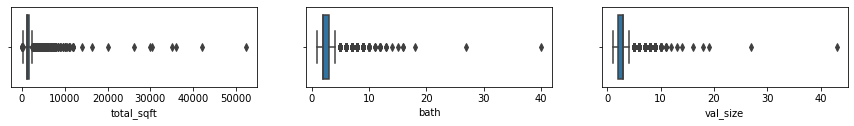

In [34]:
plt.figure(figsize=(15,5))
c = ['total_sqft', 'bath', 'val_size']
for i in enumerate(c):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1], data=X_imputed)

for i in c:
  q1 = X_imputed[i].quantile(0.1) 
  q4 = X_imputed[i].quantile(0.9) 
  X_imputed[i][X_imputed[i]<= q1] = q1
  X_imputed[i][X_imputed[i]>= q4] = q4


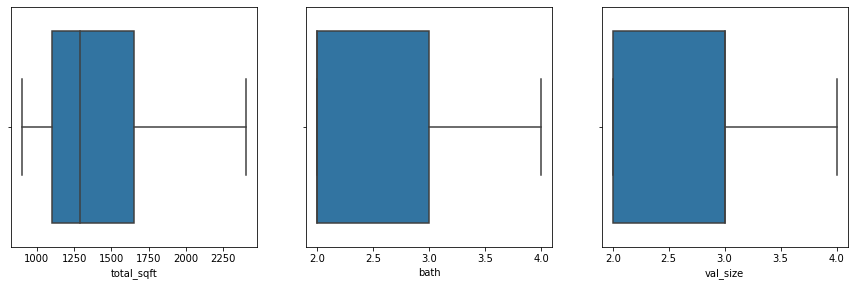

In [35]:
plt.figure(figsize=(15,15))
c = ['total_sqft',  'bath', 'val_size']
for i in enumerate(c):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1], data=X_imputed)

In [36]:
scaler = MinMaxScaler() 
c = ["total_sqft","bath", "balcony","val_size"]
X_imputed[c] = scaler.fit_transform(X_imputed[c])

**ENTRENAMIENTO**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state = 63, test_size=0.3)

In [38]:
ann = Sequential()
ann.add(Dense(12,activation='relu'))
ann.add(Dense(6,activation='relu'))
ann.add(Dense(3,activation='softmax'))
ann.compile(optimizer="adam",loss='categorical_crossentropy', metrics=["accuracy"])

In [39]:
ann.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=150, epochs= 75,verbose=1) 

Epoch 1/75
63/63 [==============================] - 1s 7ms/step - loss: 1.0305 - accuracy: 0.4596 - val_loss: 1.0039 - val_accuracy: 0.5063
Epoch 2/75
63/63 [==============================] - 0s 3ms/step - loss: 0.9868 - accuracy: 0.5279 - val_loss: 0.9604 - val_accuracy: 0.5448
Epoch 3/75
63/63 [==============================] - 0s 3ms/step - loss: 0.9393 - accuracy: 0.5639 - val_loss: 0.9076 - val_accuracy: 0.5673
Epoch 4/75
63/63 [==============================] - 0s 3ms/step - loss: 0.8880 - accuracy: 0.5793 - val_loss: 0.8541 - val_accuracy: 0.5906
Epoch 5/75
63/63 [==============================] - 0s 3ms/step - loss: 0.8371 - accuracy: 0.6023 - val_loss: 0.8093 - val_accuracy: 0.6171
Epoch 6/75
63/63 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.6159 - val_loss: 0.7759 - val_accuracy: 0.6371
Epoch 7/75
63/63 [==============================] - 0s 3ms/step - loss: 0.7620 - accuracy: 0.6219 - val_loss: 0.7409 - val_accuracy: 0.6349
Epoch 8/75
63/63 [==

*GRAFICAS* DE EVALUACION

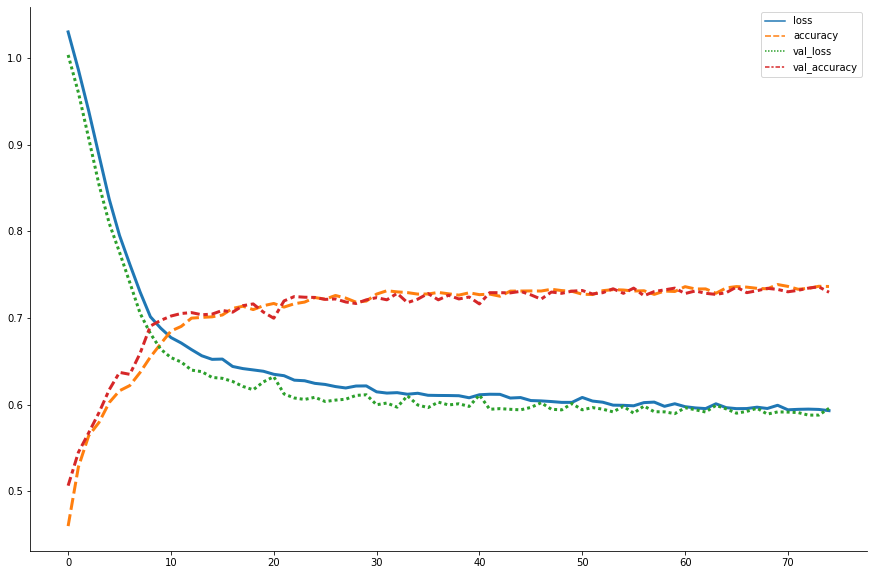

In [40]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,10))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [41]:
y_predict = ann.predict(X_test)
y_predict = y_predict > 0.5

print(classification_report(y_predict, y_test))

125/125 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       977
           1       0.52      0.77      0.62       703
           2       0.82      0.68      0.74      2282

   micro avg       0.72      0.73      0.73      3962
   macro avg       0.70      0.76      0.72      3962
weighted avg       0.75      0.73      0.73      3962
 samples avg       0.72      0.72      0.72      3962



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
